In [ ]:
from tensorflow.keras.datasets import mnist


In [ ]:
import tensorflow as tf

In [ ]:
mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


((array([[[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         ...,
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0

In [ ]:
(X_train,y_train),(X_test,y_test)=mnist.load_data()

In [ ]:
X_train.shape

(60000, 28, 28)

In [ ]:
X_test.shape

(10000, 28, 28)

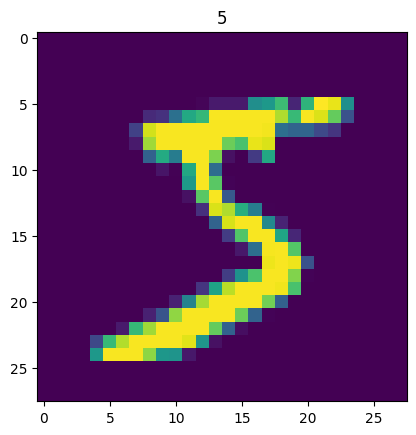

In [ ]:
import matplotlib.pyplot as plt

plt.imshow(X_train[0])
plt.title(y_train[0])
plt.show()

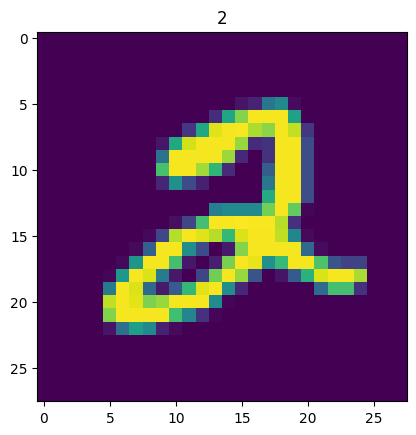

In [ ]:
plt.imshow(X_train[5])
plt.title(y_train[5])
plt.show()

### Every pixel will have 0 to 255
* and here the image is 28 *28 size


In [ ]:
import numpy as np
# from IPython.display import display
# from pandas import set_option

# # Adjust max_line_width as needed
# set_option('display.max_colwidth', 100)
np.array_str(X_train[0],max_line_width=128)

'[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]\n [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]\n [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]\n [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]\n [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]\n [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136 175  26 166 255 247 127   0   0   0   0]\n [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253 225 172 253 242 195  64   0   0   0   0]\n [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251  93  82  82  56  39   0   0   0   0   0]\n [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 182 247 2

In [ ]:
np.max(X_train)

255

In [ ]:
np.min(X_train)

0

In [ ]:
## to normalize the image data
X_train=X_train/255.0
X_test=X_test/255.0

In [ ]:
np.array_str(X_train[0],max_line_width=100)

'[[0.         0.         0.         0.         0.         0.         0.         0.\n  0.         0.         0.         0.         0.         0.         0.         0.\n  0.         0.         0.         0.         0.         0.         0.         0.\n  0.         0.         0.         0.        ]\n [0.         0.         0.         0.         0.         0.         0.         0.\n  0.         0.         0.         0.         0.         0.         0.         0.\n  0.         0.         0.         0.         0.         0.         0.         0.\n  0.         0.         0.         0.        ]\n [0.         0.         0.         0.         0.         0.         0.         0.\n  0.         0.         0.         0.         0.         0.         0.         0.\n  0.         0.         0.         0.         0.         0.         0.         0.\n  0.         0.         0.         0.        ]\n [0.         0.         0.         0.         0.         0.         0.         0.\n  0.         0.         0

In [ ]:
## Create the neural network

from tensorflow.keras.layers import Flatten,Dense
from tensorflow.keras import Sequential

In [ ]:
## Flatten is to flatten the image input as 1-Dimensional array
## Dense is to create the NN layers
## Sequential neural network

## Create the model with basic ANN
model =Sequential()

## input image with the flatten dimension
model.add(Flatten(input_shape=(28,28))) ## Flatten the image

## Hidden layer with the 128 neurons and 'relu' as the acitvation function
model.add(Dense(units=128,activation='relu'))

## output layer with ten neurons where it has to identify the digit
model.add(Dense(units=10,activation='softmax')) ## gives the ouput in probability

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101770 (397.54 KB)
Trainable params: 101770 (397.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


#### Params calculation
* #params = (#input_neurons)*(#input_neurons) + (#input_neurons)

*input layer : 28 * 28 = 784

*Hidden layer neurons: (784 * 128)+128 =100480

*output neurons: (128 * 10)+10 = 1290


In [ ]:
## create an optimizer
##
model.compile(optimizer='sgd',loss='SparseCategoricalCrossentropy',metrics=['accuracy'])

In [ ]:
history = model.fit(X_train,y_train,epochs=25,batch_size=32)

Epoch 1/25
1875/1875 [==============================] - 5s 2ms/step - loss: 0.6509 - accuracy: 0.8343
Epoch 2/25
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3382 - accuracy: 0.9049
Epoch 3/25
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2906 - accuracy: 0.9182
Epoch 4/25
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2611 - accuracy: 0.9266
Epoch 5/25
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2383 - accuracy: 0.9332
Epoch 6/25
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2197 - accuracy: 0.9384
Epoch 7/25
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2041 - accuracy: 0.9431
Epoch 8/25
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1906 - accuracy: 0.9466
Epoch 9/25
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1787 - accuracy: 0.9502
Epoch 10/25
1875/1875 [==============================] - 5s 3ms/step - loss: 0.168

In [ ]:
h=history.history
h.keys()

dict_keys(['loss', 'accuracy'])

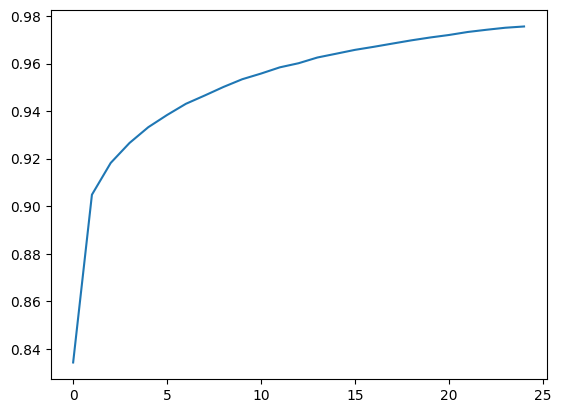

In [ ]:
plt.plot(h['accuracy'])
plt.show()

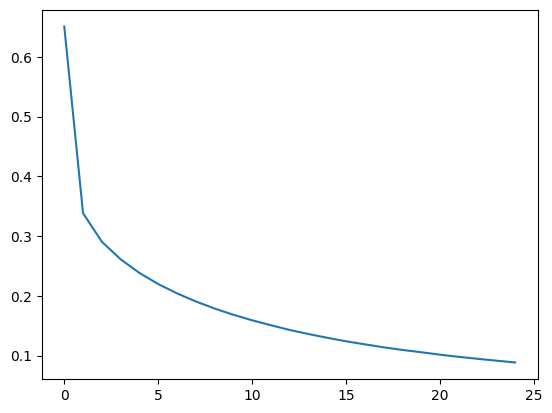

In [ ]:
plt.plot(h['loss'])
plt.show()

In [ ]:
model.evaluate(X_test,y_test)

313/313 [==============================] - 1s 4ms/step - loss: 0.1023 - accuracy: 0.9706


[0.10234533995389938, 0.9706000089645386]

In [ ]:
## prediction
y_pred = model.predict(X_test)
y_pred[0]

313/313 [==============================] - 1s 3ms/step


array([1.5901956e-05, 4.8726449e-08, 3.2851365e-04, 1.5524584e-03,
       5.3571810e-08, 3.4508816e-05, 3.3410341e-10, 9.9800116e-01,
       2.1351007e-05, 4.6121957e-05], dtype=float32)

In [ ]:
np.round(y_pred[0])

array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.], dtype=float32)

In [ ]:
y_pred = np.argmax(y_pred,axis=1)
y_pred

array([7, 2, 1, ..., 4, 5, 6])

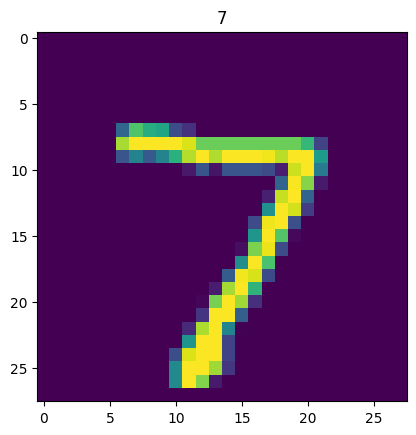

In [ ]:
plt.imshow(X_test[0])
plt.title(y_test[0])
plt.show()

In [ ]:
from sklearn.metrics import confusion_matrix

matrix=confusion_matrix(y_test,y_pred)

<Axes: >

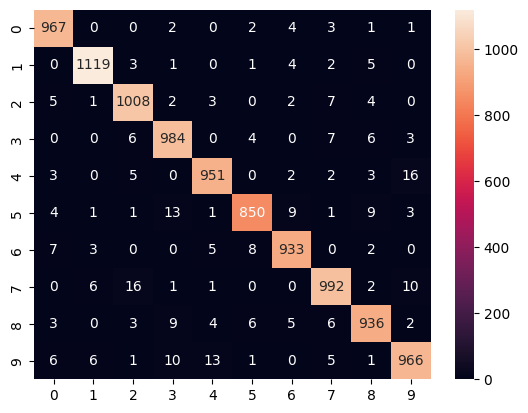

In [ ]:
import seaborn as sns
plt.plot(figsize=(10,6))
sns.heatmap(matrix,annot=True,fmt='d')